![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [332]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

%matplotlib inline

In [333]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [334]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [335]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

# Loading Data

In [336]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Inspecting and Cleaning the Data

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [338]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

In [339]:
# Checking for null values

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [340]:
# 'yr_renovated', fill missing values with 0 to show no renovation
data['yr_renovated'].fillna(0, inplace=True)

In [341]:
# 'waterfront' and 'view', fill missing values with the mode 
data['waterfront'].fillna(data['waterfront'].mode()[0], inplace=True)
data['view'].fillna(data['view'].mode()[0], inplace=True)

In [342]:
# Convert 'sqft_basement' to numeric
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce').fillna(0)

In [343]:
# Verifying changes 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Exploratory Data Analysis (EDA)

## Univariate Analysis


The stage involves an exploration process, which includes creating and visualizing histograms and box plots. This important step gives us insight into the distribution patterns of the data for each variable. By examining the histograms, we can understand the spread and frequency of values within each variable, forming a basis for further analysis. Box plots help us detect potential outliers.

In [344]:
# Checking on measures of central tendency and dispersion

price_mean = data["price"].mean()
price_mode = data["price"].mode()[0]
price_median = data["price"].median()
price_std = data["price"].std()

print("Mean:", price_mean)
print("Mode:", price_mode)
print("Median:", price_median)
print("Standard Deviation:", price_std)

Mean: 540296.5735055795
Mode: 350000.0
Median: 450000.0
Standard Deviation: 367368.1401013945


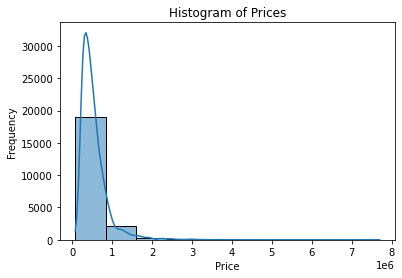

In [345]:
# Plotting a histogram of price

sns.histplot(data["price"], bins=10, kde=True, edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
plt.show()


The distribution of house prices is right-skewed, indicating that most houses are relatively inexpensive, while a small number of houses are very expensive.
Most houses priced below $1,000,000.

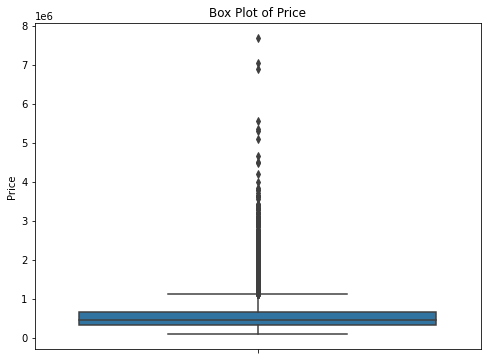

In [346]:
# Checking for outliers in the price variable
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['price'])
plt.ylabel("Price")
plt.title('Box Plot of Price')
plt.show()



Based on the box plot, there are outliers present, but we chose to retain them, assuming they accurately reflect the real-world dataset.

In [347]:
# Summary statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



This gives us a comprehensive overview of our data. Some key points include:

1. Home prices range from $78,000 to $7,700,000.
2. Most homes are priced between $322,000 and $645,000.
3. The average home has 3.3 bedrooms and 2.1 bathrooms, with approximately 2,080 square feet of living space.
4. All homes have between 1 and 3.5 floors.
5. The average home was built around 1971, though some are over 100 years old.
6. We observed a listing for a home with 33 bedrooms. This might be an extreme outlier or a data entry error, which we will investigate later.

## Bivariate Analysis


Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use a heatmap and scatterplot to check on correlation and collinearity of the variables.

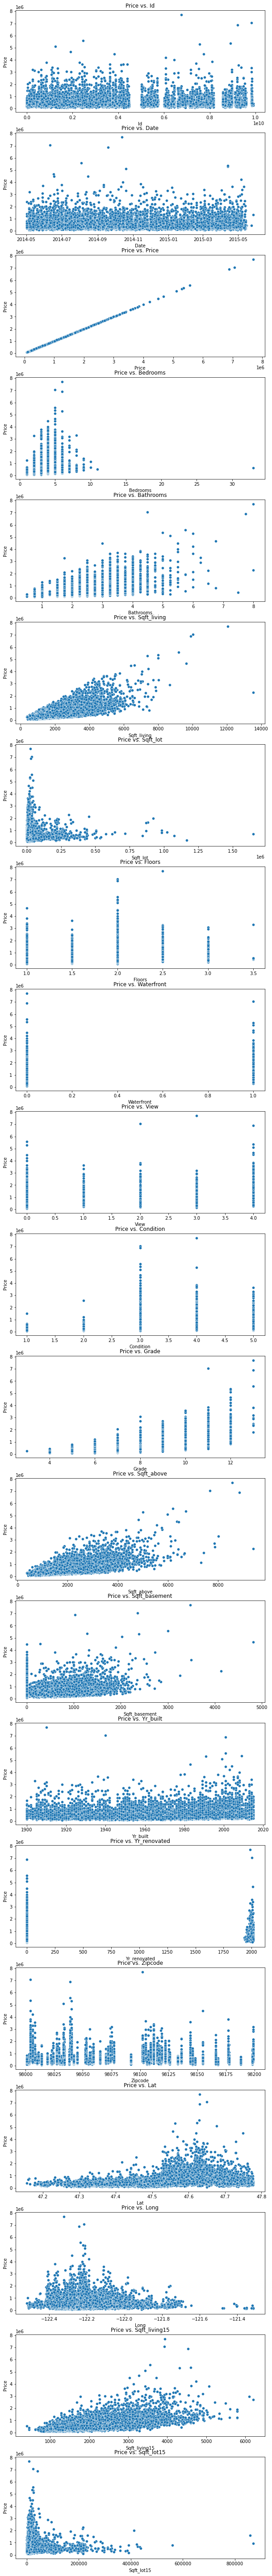

In [348]:
# Scatter plot for all features against price
all = data.columns.tolist()


fig, axes = plt.subplots(nrows=len(all), ncols=1, figsize=(10, 5 * len(all)))


for ax, all in zip(axes, all):
    sns.scatterplot(x=all, y='price', data=data, ax=ax)
    ax.set_title(f'Price vs. {all.capitalize()}')
    ax.set_xlabel(all.capitalize())
    ax.set_ylabel('Price')

In [349]:
# Calculating the correlation matrix

corr_matrix = data.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


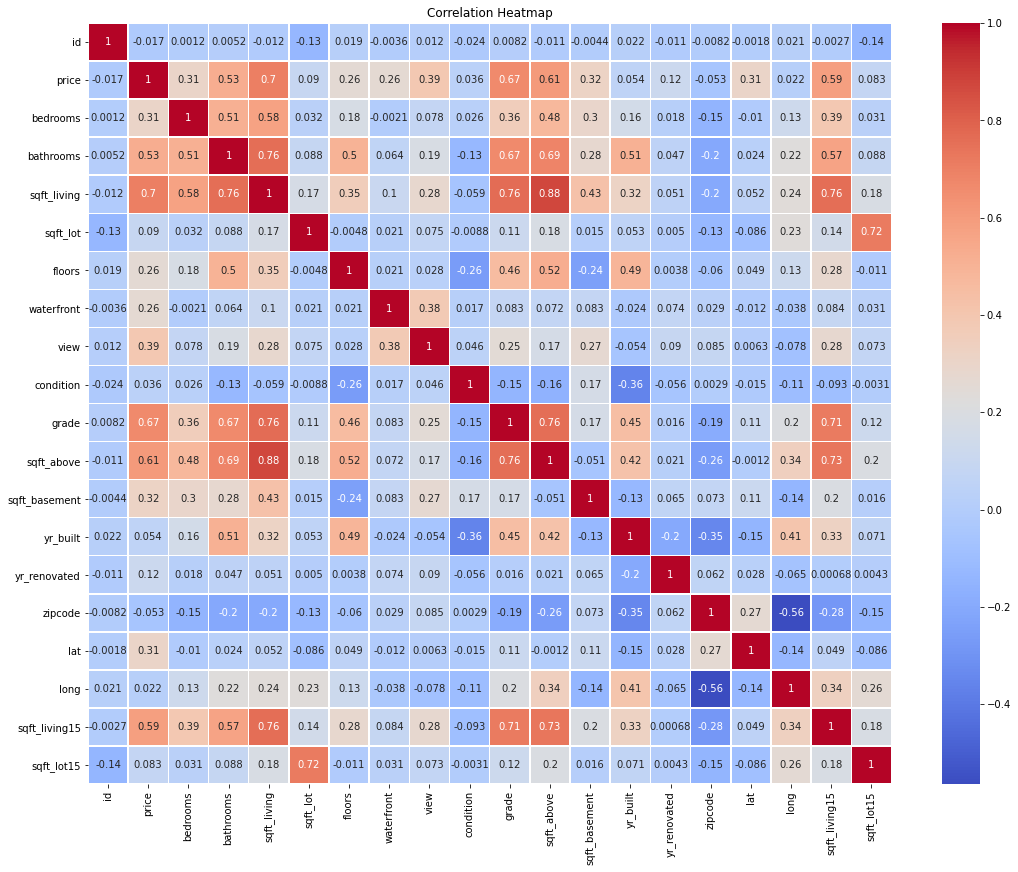

In [350]:
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* sqft_living has a strong positive correlation with price (0.70).
* grade also shows a strong positive correlation with price (0.67).
* sqft_above and bathrooms have moderate positive correlations with price (0.61 and 0.53 respectively).
* sqft_living15 has a positive correlation (0.59).

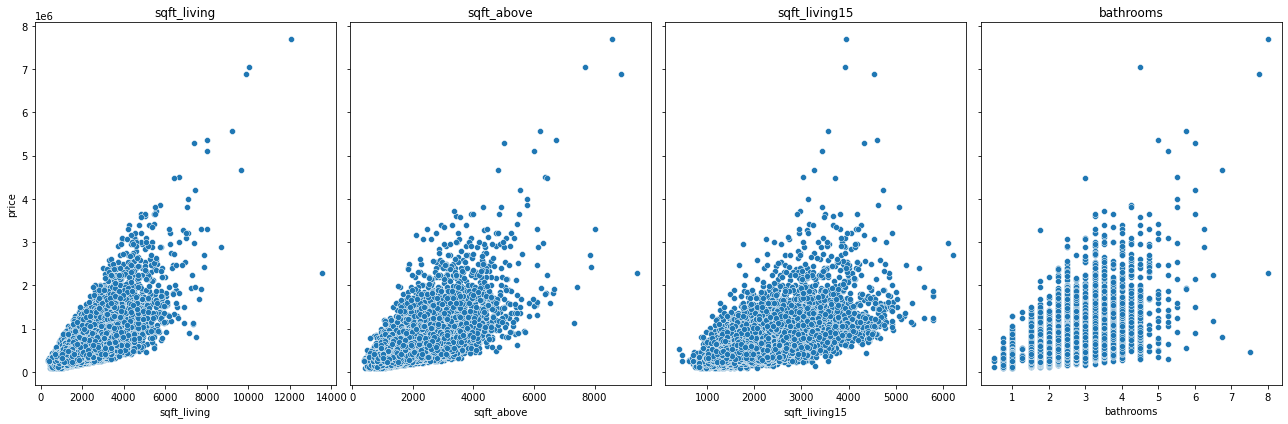

In [351]:
# Scatter plots - Plotting each predictor against the target variable

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']):
    sns.scatterplot(data=data, x=channel, y='price', ax=axs[idx])
    axs[idx].set_title(channel)
plt.tight_layout() 
plt.show()

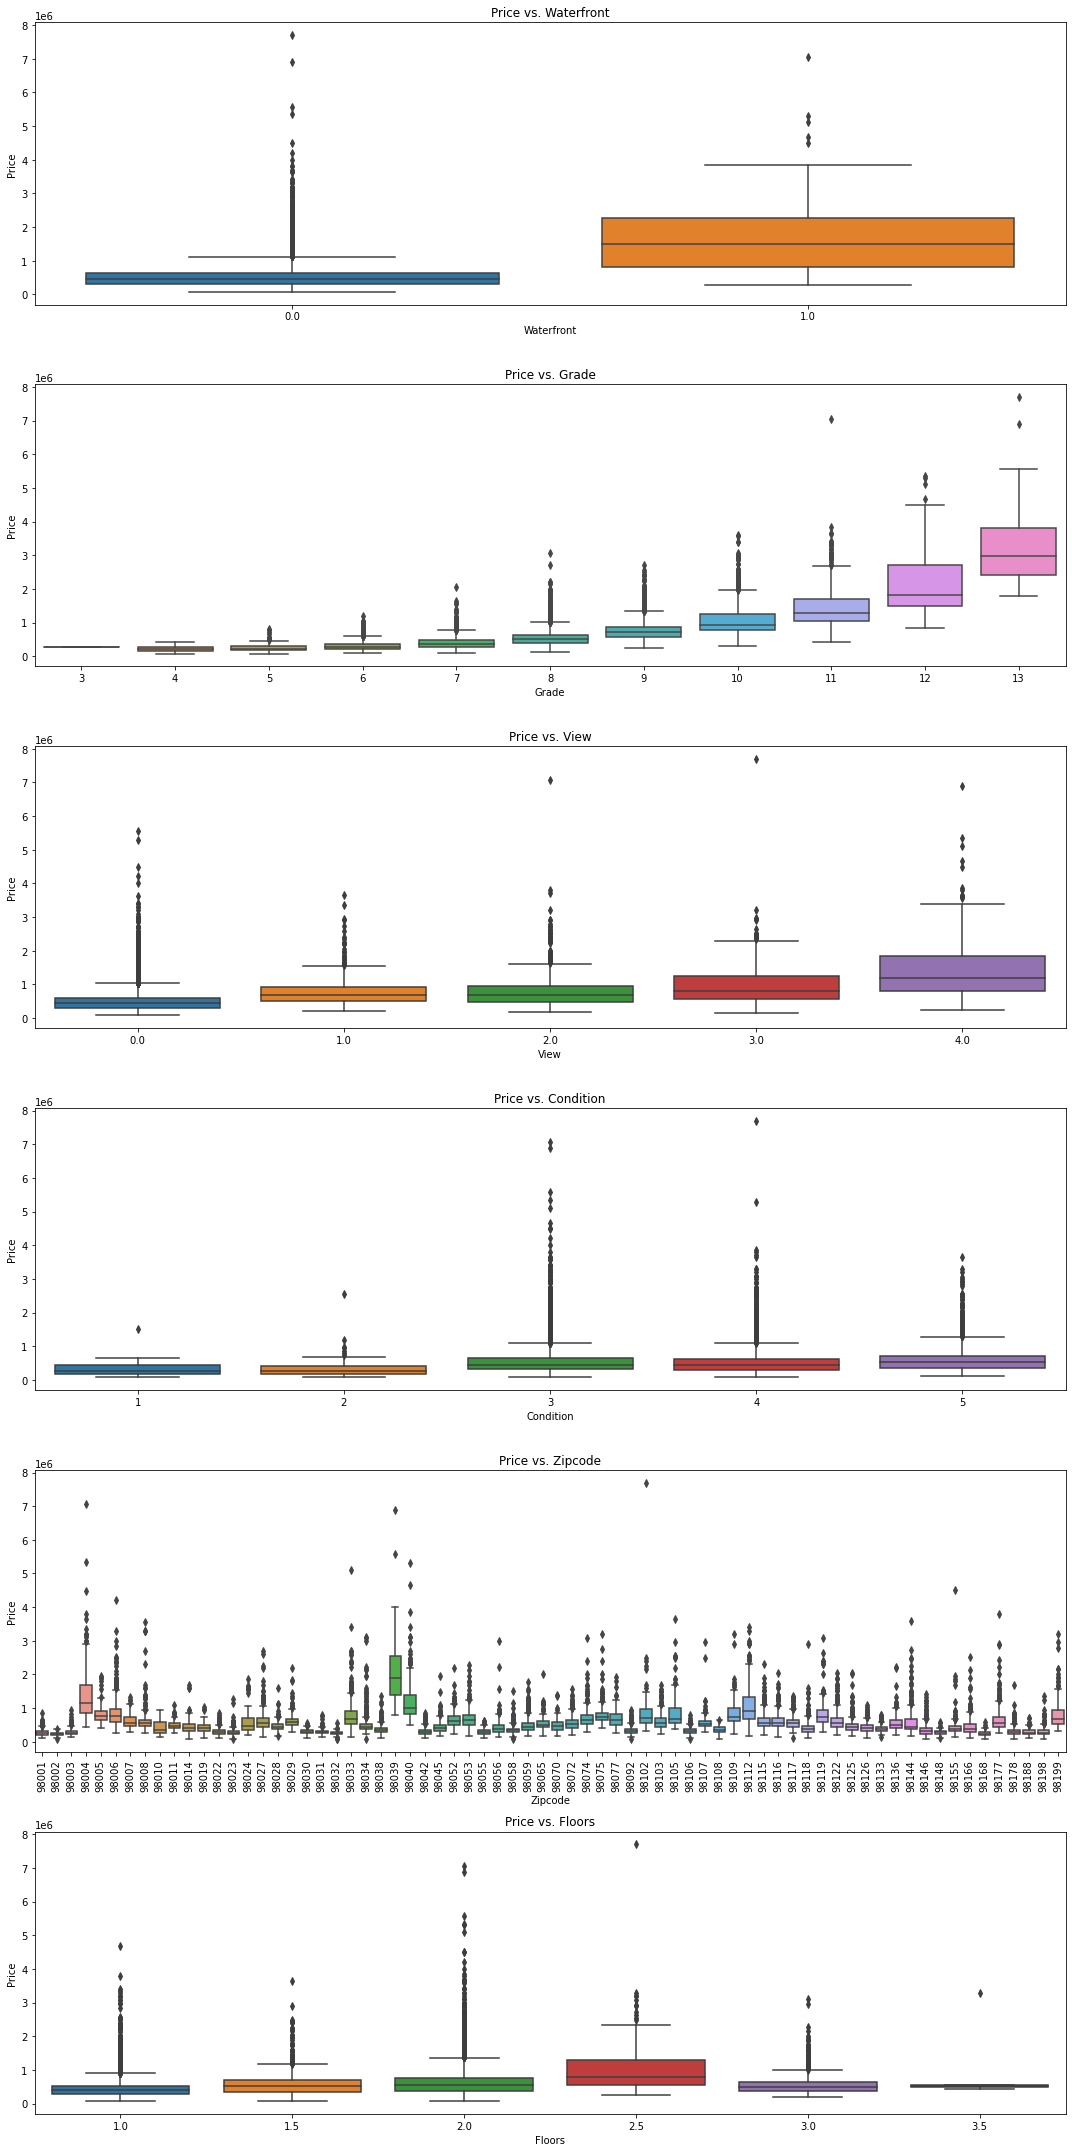

In [352]:
# Box plots
categorical_features = ['waterfront', 'grade', 'view', 'condition', 'zipcode', 'floors']


fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(15, 5 * len(categorical_features)))

for ax, feature in zip(axes, categorical_features):
    sns.boxplot(x=feature, y='price', data=data, ax=ax)
    ax.set_title(f'Price vs. {feature.capitalize()}')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Price')
    if feature == 'zipcode':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Houses with better views tend to be priced higher. 

## Modeling

## Preprocessing

In [353]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

## Baseline Model

For the baseline model, we will do a simple linear regression, using the most highly correlated feature and then we improve our model from there.

In [354]:
X = data['sqft_living']
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:50:19   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.645e+04   4961.972     -9.361      

## Interpretation of Results

1. The R-squared value of 0.492 indicates that the model explains about 49.2% of the variance in house prices based on the living area (sqft_living).
2. The relationship between sqft_living and price is highly significant as shown by the F-statistic which is high, 16760 with each additional square foot increasing the price by approximately $282.20.
3. The RMSE suggests that there is a substantial error in the model's predictions, indicating that additional features or a more complex model might be needed to improve accuracy.

## First Iteration

Here we perform the first iteration whereby we have included more features into the model. 

The following features have been added:
 * sqft_above
 * sqft_living15
 * bathrooms

In [355]:
features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms'] 

X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     4348.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:50:19   Log-Likelihood:            -2.3996e+05
No. Observations:               17277   AIC:                         4.799e+05
Df Residuals:                   17272   BIC:                         4.800e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.043e+05   6881.341    -15.151

## Checking Assumptions

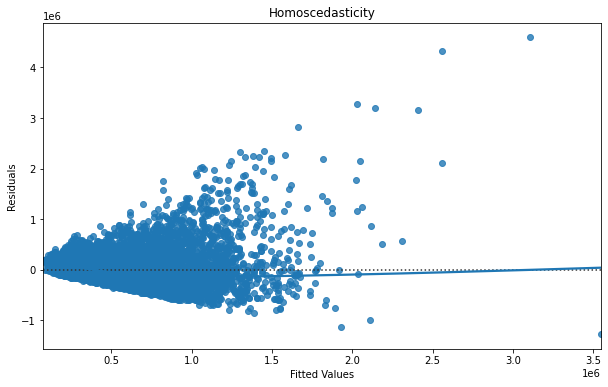

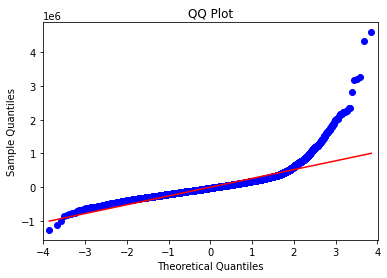

In [356]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Interpretation of Results

1. The R-quared of 0.50 indicates that approximately 50% of the variance in the dependent variable (price) can be explained by the model's independent variables.
2. The p-value is less than 0.05, meaning the model's predictors are collectively significant.
3. The plot for testing homoscedasticity indicates that the residuals display heteroscedasticity due to their divergence/variation. This suggests skewness, a heavy-tailed distribution, or the presence of outliers in the dataset.
4. In the QQ plot, the residuals deviate from the line, particularly in the tails, indicating that the residuals are not normally distributed.

## Second Iteration

The following categorical features have been added:
 * waterfront
 * view
 * condition
 * grade
 * zipcode
 * floors

In [357]:
features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms'] + \
           [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floors' in col]
X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     925.8
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:51:30   Log-Likelihood:            -2.3018e+05
No. Observations:               17277   AIC:                         4.606e+05
Df Residuals:                   17179   BIC:                         4.613e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8702.8017   1.53e+05     -0.

## Checking Assumptions

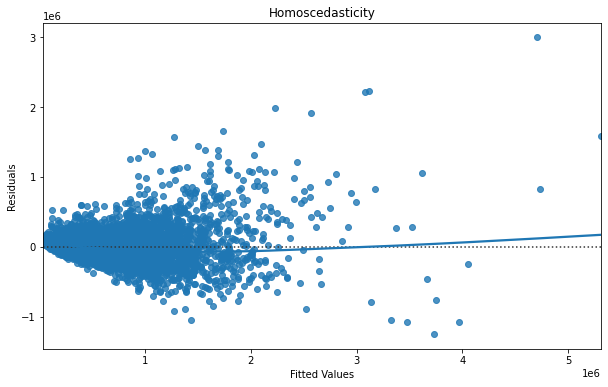

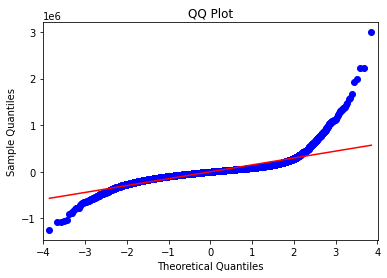

In [358]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Interpretation of Results

1. The R-quared of 0.83 indicates that approximately 83% of the variance in the dependent variable (price) can be explained by the model's independent variables.
2. The p-value is less than 0.05, meaning the model's predictors are collectively significant.
3. The plot for testing homoscedasticity indicates that the residuals display heteroscedasticity due to their divergence/variation. This suggests skewness, a heavy-tailed distribution, or the presence of outliers in the dataset.
4. In the QQ plot, the residuals deviate from the line, particularly in the tails, indicating that the residuals are not normally distributed.

## Third Iteration

In this iteration, we identify and eliminate predictors that exhibit high multicollinearity.

In [359]:
# Checking for Multicollinearity in our predictors

corr_matrix = data.corr().abs()


corr_data = corr_matrix.unstack().reset_index().sort_values(by=0, ascending=False)
corr_data['pairs'] = list(zip(corr_data.level_0, corr_data.level_1))


corr_data = corr_data[corr_data['level_0'] != corr_data['level_1']]
corr_data = corr_data.drop_duplicates(subset='pairs')


corr_data.columns = ['level_0', 'level_1', 'corr_coef', 'pairs']


high_corr_pairs = corr_data[(corr_data['corr_coef'] > 0.8) & (corr_data['corr_coef'] < 1)]

# Viewing the highly correlated predictor pairs
high_corr_pairs


,level_0,level_1,corr_coef,pairs
224,sqft_above,sqft_living,0.876448,"(sqft_above, sqft_living)"
91,sqft_living,sqft_above,0.876448,"(sqft_living, sqft_above)"


In [360]:
# Dropping sqft_living

features = ['sqft_above', 'sqft_living15', 'bathrooms'] + \
           [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floor' in col]
X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     881.3
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:53:00   Log-Likelihood:            -2.3061e+05
No. Observations:               17277   AIC:                         4.614e+05
Df Residuals:                   17180   BIC:                         4.622e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.986e+04   1.57e+05     -0.

In [361]:
# Dropping sqft_above

features = ['sqft_living', 'sqft_living15', 'bathrooms'] + \
           [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floor' in col]
X = data_encoded[features]
y = data_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     925.5
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:53:02   Log-Likelihood:            -2.3026e+05
No. Observations:               17277   AIC:                         4.607e+05
Df Residuals:                   17180   BIC:                         4.615e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2002.8993   1.54e+05     -0.

## Checking Assumptions

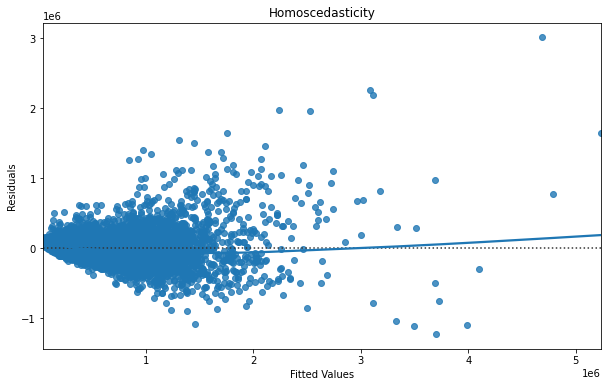

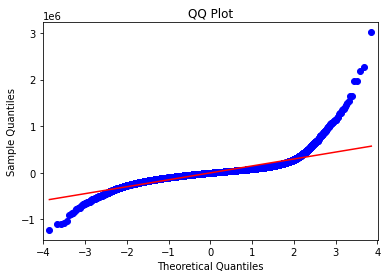

In [362]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Fourth Iteration

In this iteration, we attempted to eliminate outliers from our dataset to assess their effect on our model's performance.

In [363]:

def remove_outliers(features, data):
    for feat in features:
        mu = np.mean(data[feat])
        std = np.std(data[feat])
        outlier_threshold = 3 * std
        data = data[(data[feat] <= mu + outlier_threshold) & (data[feat] >= mu - outlier_threshold)]
    return data


features = ['sqft_living', 'sqft_living15', 'bathrooms']
X = data_encoded[features]
y = data_encoded['price']

# Combine features and target variable into a single DataFrame for easier outlier removal
data_combined = pd.concat([X, y], axis=1)

# Calculate IQR for each feature
Q1 = data_combined.quantile(0.25)
Q3 = data_combined.quantile(0.75)
IQR = Q3 - Q1


outliers = (data_combined < (Q1 - 1.5 * IQR)) | (data_combined > (Q3 + 1.5 * IQR))

# Remove outliers
data_cleaned = data_combined[~outliers.any(axis=1)]

# Separate features and target variable after removing outliers
X_cleaned = data_cleaned[features]
y_cleaned = data_cleaned['price']

# Add categorical features back to the cleaned data
categorical_features = [col for col in data_encoded.columns if 'waterfront' in col or 'view' in col or 'condition' in col or 'zipcode' in col or 'grade' in col or 'floors' in col]

# Ensure all categorical columns are present in data_cleaned
for col in categorical_features:
    if col not in data_cleaned.columns:
         data_cleaned[col] = data_encoded[col]

# Combine cleaned numerical features with categorical features
X = pd.concat([X_cleaned, data_cleaned[categorical_features]], axis=1)
y = y_cleaned

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


model = sm.OLS(y_train, X_train_const).fit()


y_pred = model.predict(X_test_const)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(model.summary())
print(f'RMSE: {rmse}')


<ipython-input-363-097106654792>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_encoded[col]


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     762.2
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:54:40   Log-Likelihood:            -2.0332e+05
No. Observations:               15924   AIC:                         4.068e+05
Df Residuals:                   15829   BIC:                         4.076e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4650.5841   8.75e+04     -0.

## Checking Assumptions

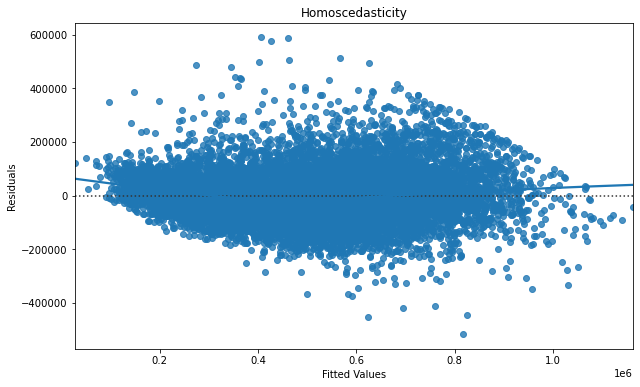

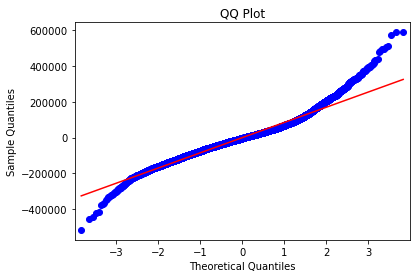

In [364]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Fifth Iteration (Final Model)

In this iteration, we apply normalization and log-transformations to the data. These steps will reduce the impact of outliers, making the dataset more robust and enhancing the linear relationship between the target variable (price) and the features.

In [365]:

X = pd.concat([X_cleaned, data_cleaned[categorical_features]], axis=1)
y = y_cleaned

# Apply log transformation to the numerical features
numerical_features = ['sqft_living', 'sqft_living15', 'bathrooms']
X[numerical_features] = X[numerical_features].apply(lambda x: np.log(x + 1))  
y = np.log(y + 1) 

# Normalize the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

y_pred_log = model.predict(X_test_const)

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log) - 1
y_test_original = np.exp(y_test) - 1

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(model.summary())
print(f'RMSE: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     833.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:56:22   Log-Likelihood:                -8318.3
No. Observations:               15924   AIC:                         1.683e+04
Df Residuals:                   15829   BIC:                         1.756e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9488      0.421     -2.

## Checking Assumptions

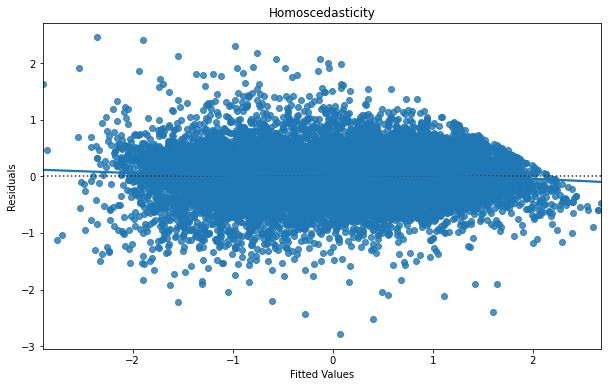

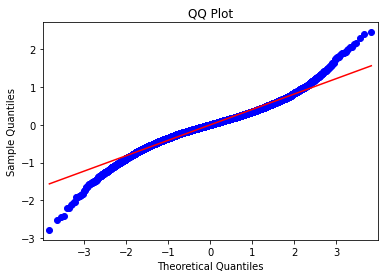

In [366]:
# Testing for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train_const), y=y_train - model.predict(X_train_const), lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()
print('\n')
    
# Testing for normality using a QQ-plot 
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

## Model Validation


In this project, the model's validation was conducted using the following approaches:

1. Residual Analysis:

    Homoscedasticity: Residual plots were used to check for homoscedasticity, ensuring that residuals had constant variance across all levels of the predicted values. This is important for validating the assumptions of linear regression.
    Normality of Residuals: QQ plots were used to examine if the residuals followed a normal distribution, which is another key assumption for linear regression.

2. Root Mean Squared Error (RMSE):

    The RMSE was computed for the test set predictions to quantify the model's prediction error. Lower RMSE values indicate better model performance.
    RMSE was used at different iterations to compare models and determine improvements.

3. R-Squared and Adjusted R-Squared:

    These metrics were used to evaluate the proportion of variance in the dependent variable (house prices) explained by the independent variables.
    An increase in R-Squared from one iteration to the next indicated improved model performance.

4. Train-Test Split:

    Data was split into training and testing sets (80-20 split) to evaluate the model on unseen data. This helps in assessing the model's ability to generalize to new data.

## Conclusion

After several iterations of refining the model, the final model showed significant improvements:

Final Model Performance:

The R-Squared value improved to 0.83, indicating that 83% of the variance in house prices can be explained by the model's features.
The RMSE of the final model (0.7995) was significantly lower than the initial baseline model (256860.6115), indicating better predictive performance.

The features sqft_living, sqft_above, sqft_living15, and bathrooms were consistently significant predictors of house prices.
Categorical features such as waterfront, view, condition, grade, and zipcode also had a significant impact on house prices.